In [61]:
# Necessary imports
import glob
import pandas as pd
import urllib.request
import imageio
import os
import numpy as np
import numpy as np
import tensorflow as tf
from PIL import Image
import os
import tensorflow_hub as hub
import IPython
from urllib.request import urlopen
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense, Concatenate 
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from sklearn.metrics import mean_squared_error

import os
import csv
import os
import csv
import numpy as np
import gensim.downloader as api

import numpy as np
from PIL import Image
from tqdm import tqdm
import os 
import time
import matplotlib.pyplot as plt

In [3]:
glove_model = api.load('glove-twitter-200')

In [4]:
# # Load Glove Function
# def loadGloveModel(gloveFile):
#     print("Loading Glove Model")
#     f = open(gloveFile,'r',encoding="utf8")
#     model = {}
#     for line in f:
#         try:
#             splitLine = line.split()
#             word = splitLine[0]
#             embedding = np.array([float(val) for val in splitLine[1:]])
#             model[word] = embedding
#         except:
#             print(word)
#     print("Done.",len(model)," words loaded!")
#     return model

In [5]:
# glove_embeddings = loadGloveModel("./glove.6B.100d.txt")

In [6]:
# # Setting up the paths
# train_data_path = "./Data/datasets/flowers/"
# train_images_path = "./Data/datasets/flowers/jpg"
# train_captions_path = "./Data/datasets/flowers/text_c10"

The following packages will be used to implement a basic GAN system in Python/Keras.

In [7]:
# # Formatted time string
# def hms_string(sec_elapsed):
#     h = int(sec_elapsed / (60 * 60))
#     m = int((sec_elapsed % (60 * 60)) / 60)
#     s = sec_elapsed % 60
#     return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [10]:
# Generation resolution - Must be square 
# Training data is also scaled to this.
GENERATE_RES = 2 # Generation resolution factor 
# (1=32, 2=64, 3=96, 4=128, etc.)
GENERATE_SQUARE = 32 * GENERATE_RES # rows/cols (should be square)
IMAGE_CHANNELS = 3

# Preview image 
PREVIEW_ROWS = 4
PREVIEW_COLS = 7
PREVIEW_MARGIN = 16

# Size vector to generate images from
SEED_SIZE = 100
EMBEDDING_SIZE = 200

BATCH_SIZE = 64
BUFFER_SIZE = 4000

print(f"Will generate {GENERATE_SQUARE}px square images.")

Will generate 64px square images.


## Data Pre-Processing 

Next we will load and preprocess the images.  This can take awhile.  Google CoLab took around an hour to process.  Because of this we store the processed file as a binary.  This way we can simply reload the processed training data and quickly use it.  It is most efficient to only perform this operation once.  The dimensions of the image are encoded into the filename of the binary file because we need to regenerate it if these change.

In [11]:
# # Image set has 8,188 images.  Can take over an hour 
# # for initial preprocessing.
# # Because of this time needed, save a Numpy preprocessed file.

# training_binary_path = os.path.join("./Data/datasets/flowers/images/npy64",
#         f'training_data_{GENERATE_SQUARE}_{GENERATE_SQUARE}_')

# start = time.time()
# print("Loading training images...")

# training_data = []
# flowers_path = sorted(os.listdir(DATA_PATH))

# for filename in range(len(flowers_path)):
#     path = os.path.join(DATA_PATH,flowers_path[filename])
#     # print(path)
#     try:
#         image = Image.open(path).resize((GENERATE_SQUARE,GENERATE_SQUARE),Image.ANTIALIAS)
#         channel = np.asarray(image).shape[2]
#         if channel == 3:
#             training_data.append(np.asarray(image))
#     except KeyboardInterrupt:
#         print("Keyboard Interrup by me...")
#         break
#     except:
#         pass
#     if len(training_data) == 100:
#         training_data = np.reshape(training_data,(-1,GENERATE_SQUARE,GENERATE_SQUARE,IMAGE_CHANNELS))
#         training_data = training_data.astype(np.float32)
#         #Normalizing the input
#         training_data = training_data / 127.5 - 1.

#         print("Saving training image " + str(100000 + filename) + ".npy")
#         np.save(training_binary_path + str(100000 + filename) + ".npy",training_data)
#         elapsed = time.time()-start
#         print (f'Image preprocess time: {hms_string(elapsed)}')
#         training_data = []
# print("Complete")

Next we will load and preprocess the captions. This can take awhile. Google CoLab took around an hour to process. Because of this we store the processed file as a binary. This way we can simply reload the processed data and quickly use it. It is most efficient to only perform this operation once.

In [12]:

# # Define the path to the root directory containing the folders
# root_directory = './Data/datasets/flowers/text_c10/'

# # Create a list to store the text data
# text_data = []

# # Loop through each folder in the root directory
# for folder_name in os.listdir(root_directory):
#     folder_path = os.path.join(root_directory, folder_name)
#     # Check if the path is a directory
#     if os.path.isdir(folder_path):
#         # Loop through each text file in the directory
#         for file_name in os.listdir(folder_path):
#             file_path = os.path.join(folder_path, file_name)
#             # Check if the path is a file and if it has a .txt extension
#             if os.path.isfile(file_path) and file_name.endswith('.txt'):
#                 # Open the file and read its contents
#                 with open(file_path, 'r') as file:
#                     file_contents = file.read()
#                 # Append the file name and contents to the text_data list
#                 text_data.append([folder_name, file_name, file_contents])

# # Write the contents of the text_data list to a CSV file
# with open('output.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Folder', 'File Name', 'Text'])
#     for row in text_data:
#         writer.writerow(row)



In [13]:
# # Load pre-trained GloVe embeddings
# glove_model = api.load('glove-twitter-200')

# # Define the path to the captions.csv file
# # captions_path = "./captions.csv"
# captions_path = "./output.csv"

# # Read the contents of the captions.csv file into a list of dictionaries
# with open(captions_path, 'r') as file:
#     reader = csv.DictReader(file)
#     captions = [row['Text'] for row in reader]

# # Generate embeddings for each caption
# caption_embeddings = np.zeros((len(captions), 200), dtype=np.float32)
# for i, caption in enumerate(captions):
#     # Split the caption into individual words
#     words = caption.split()
#     # Calculate the average embedding for the words in the caption
#     word_embeddings = [glove_model[word.lower()] for word in words if word.lower() in glove_model]
#     if len(word_embeddings) > 0:
#         caption_embeddings[i] = np.mean(word_embeddings, axis=0)

# # Save the caption embeddings to a file
# np.save('./Data/datasets/flowers/text_c10/caption_embeddings.npy', caption_embeddings)


In [14]:
# # saving the caption embeddings numpy
# embedding_binary_path = os.path.join('D:/Text-to-Image-Using-GAN-master/Data/datasets/flowers/images/embedding_npy',
#         f'embedding_data.npy')
# print("Saving captions embeddings binary...")
# np.save(embedding_binary_path,caption_embeddings)

In [15]:
# # # Creating a dataframe to store the captions
# # df_captions = pd.DataFrame([])
# # df_captions['captions'] = captions[:len(final_images)]
# df_captions = pd.read_csv("./output.csv")

In [16]:
# df_captions.head()

## Loading and combining numpys

In [21]:
caption_embeddings = np.load('D:/Text-to-Image-Using-GAN-master/Data/datasets/flowers/text_c10/caption_embeddings.npy')
print(caption_embeddings.shape)

(8189, 200)


In [19]:
#caption_embeddings = caption_embeddings[::5]

In [22]:
caption_embeddings.shape

(8189, 200)

In [23]:
image_binary_path = "D:/Text-to-Image-Using-GAN-master/Data/datasets/flowers/images/npy64/"
images = os.listdir(image_binary_path)

In [24]:
# images[-1]

In [25]:
# Creating a list of all the preprocessed images
final_images = np.load(image_binary_path + images[0])
for i in images[1:]:
    #print(i)
    try:
        final_images = np.concatenate([final_images,np.load(image_binary_path + i)],axis = 0)
    except:
        pass

In [26]:
# final_images.shape

In [27]:
# captions = list(df_captions.Text)

In [28]:
#df_captions = df_captions.rename(columns={'File Name': 'id', 'Text': 'captions'})

In [30]:
#len(captions)

Saved images separately for testing

In [23]:
# save_images_captions = captions[:28].copy()
# save_images_embeddings = np.copy(caption_embeddings[:28])
# save_images_npy = np.copy(final_images[:28])

In [24]:
# caption_embeddings = caption_embeddings[:final_images.shape[0]]

In [42]:
caption_embeddings.shape# 

(8189, 200)

Shuffling the data

In [43]:
# p = np.random.permutation(len(final_images))

In [44]:
# final_images_shuffled = final_images[p]
# final_embeddings_shuffled = caption_embeddings[p]

In [45]:
# final_images_shuffled.shape

In [46]:
final_embeddings_shuffled.shape

(8100, 200)

In [48]:
# # Batch and shuffle the data
# # train_dataset = tf.data.Dataset.from_tensor_slices(training_data) \
# #     .shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# train_dataset = tf.data.Dataset.from_tensor_slices({'images': final_images,
#                                                     'embeddings': caption_embeddings}).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Data Modeling

Defining the Generator and Discriminator

In [49]:
def build_generator_func(seed_size, embedding_size, channels):
    input_seed = Input(shape=seed_size)
    input_embed = Input(shape = embedding_size)
    d0 = Dense(128)(input_embed)
    leaky0 = LeakyReLU(alpha=0.2)(d0)

    merge = Concatenate()([input_seed, leaky0])

    d1 = Dense(4*4*256,activation="relu")(merge)
    reshape = Reshape((4,4,256))(d1)

    upSamp1 = UpSampling2D()(reshape)
    conv2d1 = Conv2DTranspose(256,kernel_size=5,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(upSamp1)
    batchNorm1 = BatchNormalization(momentum=0.8)(conv2d1)
    leaky1 = LeakyReLU(alpha=0.2)(batchNorm1)

    upSamp2 = UpSampling2D()(leaky1)
    conv2d2 = Conv2DTranspose(256,kernel_size=5,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(upSamp2)
    batchNorm2 = BatchNormalization(momentum=0.8)(conv2d2)
    leaky2 = LeakyReLU(alpha=0.2)(batchNorm2)

    upSamp3 = UpSampling2D()(leaky2)
    conv2d3 = Conv2DTranspose(128,kernel_size=4,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(upSamp3)
    batchNorm3 = BatchNormalization(momentum=0.8)(conv2d3)
    leaky3 = LeakyReLU(alpha=0.2)(batchNorm3)

    upSamp4 = UpSampling2D(size=(GENERATE_RES,GENERATE_RES))(leaky3)
    conv2d4 = Conv2DTranspose(128,kernel_size=4,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(upSamp4)
    batchNorm4 = BatchNormalization(momentum=0.8)(conv2d4)
    leaky4 = LeakyReLU(alpha=0.2)(batchNorm4)

    outputConv = Conv2DTranspose(channels,kernel_size=3,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(leaky4)
    outputActi = Activation("tanh")(outputConv)

    model = Model(inputs=[input_seed,input_embed], outputs=outputActi)
    return model

def build_discriminator_func(image_shape, embedding_size):
    input_shape = Input(shape=image_shape)
    input_embed = Input(shape=embedding_size)

    conv2d1 = Conv2D(32,kernel_size=4,strides=2,input_shape=image_shape,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(input_shape)
    leaky1 = LeakyReLU(alpha=0.2)(conv2d1)

    drop2 = Dropout(0.25)(leaky1)
    conv2d2 = Conv2D(64, kernel_size=4, strides=2, padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(drop2)
    # zero2 = ZeroPadding2D(padding=((0,1),(0,1)))(conv2d2)
    batchNorm2 = BatchNormalization(momentum=0.8)(conv2d2)
    leaky2 = LeakyReLU(alpha=0.2)(batchNorm2)

    drop3 = Dropout(0.25)(leaky2)
    conv2d3 = Conv2D(128, kernel_size=4, strides=2, padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(drop3)
    batchNorm3 = BatchNormalization(momentum=0.8)(conv2d3)
    leaky3 = LeakyReLU(alpha=0.2)(batchNorm3)

    drop4 = Dropout(0.25)(leaky3)
    conv2d4 = Conv2D(256, kernel_size=4, strides=2, padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(drop4)
    batchNorm4 = BatchNormalization(momentum=0.8)(conv2d4)
    leaky4 = LeakyReLU(alpha=0.2)(batchNorm4)

    dense_embed = Dense(128,kernel_initializer=initializers.RandomNormal(stddev=0.02))(input_embed)
    leaky_embed = LeakyReLU(alpha=0.2)(dense_embed)
    reshape_embed = Reshape((4,4,8))(leaky_embed)
    merge_embed = Concatenate()([leaky4, reshape_embed])

    drop5 = Dropout(0.25)(merge_embed)
    conv2d5 = Conv2D(512, kernel_size=4,kernel_initializer=initializers.RandomNormal(stddev=0.02))(drop5)
    batchNorm5 = BatchNormalization(momentum=0.8)(conv2d5)
    leaky5 = LeakyReLU(alpha=0.2)(batchNorm5)

    drop6 = Dropout(0.25)(leaky5)
    flatten = Flatten()(drop6)
    output = Dense(1,activation="sigmoid")(flatten)

    model = Model(inputs=[input_shape,input_embed], outputs=output)
    return model

Function to save image samples generated

In [50]:
def save_images(cnt,noise,embeds):
    image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3), 
      255, dtype=np.uint8)

    generated_images = generator.predict((noise,embeds))

    generated_images = 0.5 * generated_images + 0.5

    image_count = 0
    for row in range(PREVIEW_ROWS):
        for col in range(PREVIEW_COLS):
            r = row * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
            c = col * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
            image_array[r:r+GENERATE_SQUARE,c:c+GENERATE_SQUARE] \
            = generated_images[image_count] * 255
            image_count += 1
    
    output_path = "D:/output/gan"
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    filename = os.path.join(output_path,f"train-{cnt}.png")
    im = Image.fromarray(image_array)
    im.save(filename)

tf.Tensor([[0.49828902]], shape=(1, 1), dtype=float32)


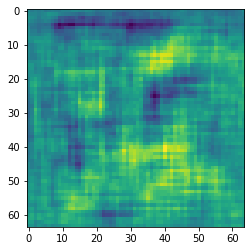

In [51]:
# Initlializing a generator
generator = build_generator_func(SEED_SIZE,EMBEDDING_SIZE, IMAGE_CHANNELS)
# Sample output from the Generator
noise = tf.random.normal([1, 100])
generated_image = generator((noise,caption_embeddings[5].reshape(1,200)), training=False)
plt.imshow(generated_image[0, :, :, 0])

# Initlializing a discriminator
image_shape = (GENERATE_SQUARE,GENERATE_SQUARE,IMAGE_CHANNELS)
discriminator = build_discriminator_func(image_shape,EMBEDDING_SIZE)

decision = discriminator((generated_image,caption_embeddings[5].reshape(1,200)))
print(decision)

In [52]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_image_real_text, fake_image_real_text, real_image_fake_text):
    real_loss = cross_entropy(tf.random.uniform(real_image_real_text.shape,0.8,1.0), real_image_real_text)
    fake_loss = (cross_entropy(tf.random.uniform(fake_image_real_text.shape,0.0,0.2), fake_image_real_text) + 
                 cross_entropy(tf.random.uniform(real_image_fake_text.shape,0.0,0.2), real_image_fake_text))/2

    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

Both the generator and discriminator use Adam and the same learning rate and momentum.  This does not need to be the case.  If you use a **GENERATE_RES** greater than 3 you may need to tune these learning rates, as well as other training and hyperparameters.  

In [53]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=2e-4,
#     decay_steps=100,
#     decay_rate=0.5)
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=2.0e-4,beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=2.0e-4,beta_1 = 0.5)

## Training

In [54]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images,captions,fake_captions):
    seed = tf.random.normal([BATCH_SIZE, SEED_SIZE],dtype=tf.float32)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator((seed,captions), training=True)
        real_image_real_text = discriminator((images,captions), training=True)
        real_image_fake_text = discriminator((images,fake_captions), training=True)
        fake_image_real_text = discriminator((generated_images,captions), training=True)

        gen_loss = generator_loss(fake_image_real_text)
        disc_loss = discriminator_loss(real_image_real_text, fake_image_real_text, real_image_fake_text)
        # print(gen_loss)
        # print(disc_loss)

        gradients_of_generator = gen_tape.gradient(\
            gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(\
            disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(
            gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(
            gradients_of_discriminator, 
            discriminator.trainable_variables))
        return gen_loss,disc_loss

In [55]:
# import matplotlib.pyplot as plt

# # initialize FPR list
# fpr_list = []

# # function that executes training process
# def train(train_dataset, epochs):
#     fixed_seed = np.random.normal(0, 1, (PREVIEW_ROWS * PREVIEW_COLS,SEED_SIZE))
#     fixed_embed = save_images_embeddings

#     start = time.time()

#     for epoch in range(epochs):
#         print("epoch start...")
#         epoch_start = time.time()

#         gen_loss_list = []
#         disc_loss_list = []
#         gen_losses = []
#         disc_losses = []

#         for batch in train_dataset[:-1]:
#             train_batch = batch['images']
#             caption_batch = batch['embeddings']

#             fake_caption_batch = np.copy(caption_batch)
#             np.random.shuffle(fake_caption_batch)

#             t = train_step(train_batch,caption_batch,fake_caption_batch)
#             gen_loss_list.append(t[0])
#             disc_loss_list.append(t[1])

#             # get discriminator predictions for real/fake images and real/fake captions
#             real_image_real_text = discriminator((train_batch, caption_batch), training=False)
#             real_image_fake_text = discriminator((train_batch, fake_caption_batch), training=False)
#             fake_image_real_text = discriminator((generator((seed, caption_batch), training=False), caption_batch), training=False)

#             # calculate false positive rate (FPR) for real/fake captions
#             fpr_real = tf.keras.metrics.FalsePositives()
#             fpr_real.update_state(tf.ones_like(real_image_real_text), real_image_real_text)
#             fpr_real.update_state(tf.zeros_like(real_image_fake_text), real_image_fake_text)
#             fpr_real_result = fpr_real.result().numpy()

#             fpr_fake = tf.keras.metrics.FalsePositives()
#             fpr_fake.update_state(tf.ones_like(real_image_real_text), fake_image_real_text)
#             fpr_fake.update_state(tf.zeros_like(real_image_fake_text), real_image_fake_text)
#             fpr_fake_result = fpr_fake.result().numpy()

#             # append FPR to list
#             fpr_list.append((fpr_real_result + fpr_fake_result) / 2)

#         # calculate average generator/discriminator loss for epoch
#         g_loss = sum(gen_loss_list) / len(gen_loss_list)
#         d_loss = sum(disc_loss_list) / len(disc_loss_list)

#         epoch_elapsed = time.time()-epoch_start
#         print(f'Epoch {epoch+1}, gen loss={g_loss}, disc loss={d_loss}, {hms_string(epoch_elapsed)}')

#         # plot FPR vs. training step
#         plt.plot(fpr_list)
#         plt.title("False Positive Rate (FPR)")
#         plt.xlabel("Training Step")
#         plt.ylabel("FPR")
#         plt.show()

#         # save generator/discriminator models and preview images
#         save_images(epoch,fixed_seed,fixed_embed)
#         generator.save(os.path.join(MODEL_PATH,"text_to_image_generator_cub_character.h5"))
#         discriminator.save(os.path.join(MODEL_PATH,"text_to_image_disc_cub_character.h5"))
#         print("model saved")

#         elapsed = time.time()-start


In [56]:
# # Function that executes trianing process
# def train(train_dataset, epochs):
#     fixed_seed = np.random.normal(0, 1, (PREVIEW_ROWS * PREVIEW_COLS,SEED_SIZE))
#     fixed_embed = save_images_embeddings

#     start = time.time()

#     for epoch in range(epochs):
#         print("epoch start...")
#         epoch_start = time.time()

#         gen_loss_list = []
#         disc_loss_list = []
#         gen_losses = []
#         disc_losses = []

#         for batch in train_dataset[:-1]:
#           # train_batch = training_data[BATCH_SIZE*image_batch : BATCH_SIZE*image_batch + BATCH_SIZE]
#           # caption_batch = captions[BATCH_SIZE*image_batch : BATCH_SIZE*image_batch + BATCH_SIZE]
#             train_batch = batch['images']
#             caption_batch = batch['embeddings']

#             fake_caption_batch = np.copy(caption_batch)
#             np.random.shuffle(fake_caption_batch)

#             t = train_step(train_batch,caption_batch,fake_caption_batch)
#             # print(t)
#             gen_loss_list.append(t[0])
#             disc_loss_list.append(t[1])
#             # if image_batch%50 == 0:
#             #   print(image_batch)
#             # print("here")
#         print("now")
#         g_loss = sum(gen_loss_list) / len(gen_loss_list)
#         d_loss = sum(disc_loss_list) / len(disc_loss_list)

#         epoch_elapsed = time.time()-epoch_start
#         print(f'Epoch {epoch+1}, gen loss={g_loss},disc loss={d_loss}, {hms_string(epoch_elapsed)}')
#         save_images(epoch,fixed_seed,fixed_embed)
#         generator.save(os.path.join(MODEL_PATH,"text_to_image_generator_cub_character.h5"))
#         discriminator.save(os.path.join(MODEL_PATH,"text_to_image_disc_cub_character.h5"))
#         print("model saved")

#         elapsed = time.time()-start



In [39]:
train(list(train_dataset.as_numpy_iterator()), 2500)

2023-04-24 18:16:31.568334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [8100,200]
	 [[{{node Placeholder/_0}}]]
2023-04-24 18:16:31.568546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [8100,64,64,3]
	 [[{{node Placeholder/_1}}]]


epoch start...


2023-04-24 18:16:34.010887: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-04-24 18:16:35.118587: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f1b640c1f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-24 18:16:35.118626: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2023-04-24 18:16:35.122011: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-24 18:16:35.177503: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-24 18:16:35.236023: I ./tensorflow/compiler/jit/device_compile

now
Epoch 1, gen loss=0.7084743976593018,disc loss=1.5723927021026611, 0:00:12.27
1/1 [==============================] - 0s 376ms/step
model saved
epoch start...
now
Epoch 2, gen loss=0.7700285911560059,disc loss=1.4732749462127686, 0:00:04.53
1/1 [==============================] - 0s 76ms/step
model saved
epoch start...
now
Epoch 3, gen loss=0.7609009742736816,disc loss=1.4388355016708374, 0:00:04.42
1/1 [==============================] - 0s 15ms/step
model saved
epoch start...
now
Epoch 4, gen loss=0.736353874206543,disc loss=1.4371693134307861, 0:00:04.37
1/1 [==============================] - 0s 14ms/step
model saved
epoch start...
now
Epoch 5, gen loss=0.7368239760398865,disc loss=1.4316972494125366, 0:00:04.40
1/1 [==============================] - 0s 16ms/step
model saved
epoch start...
now
Epoch 6, gen loss=0.7328377366065979,disc loss=1.4210788011550903, 0:00:04.40
1/1 [==============================] - 0s 14ms/step
model saved
epoch start...
now
Epoch 7, gen loss=0.7242469787

## Results

In [71]:
generator.load_weights("C:/Users/HP/Desktop/project/Gan/text_to_image_generator_cub_character.h5")
discriminator.load_weights("C:/Users/HP/Desktop/project/Gan/text_to_image_disc_cub_character.h5")

In [66]:
# # Printing the captions
# save_images_captions

In [67]:
def test_image(text,num):
    test_embeddings = np.zeros((1,200),dtype=np.float32)

    x = text.lower()
    x = x.replace(" ","")
    count = 0
    for t in x:
        try:
            test_embeddings[0] += glove_model[t]
            count += 1
        except:
            #print(t)
            pass
    #print(test_embeddings)
    if count != 0:
        test_embeddings[0] /= count
    else:
        return
    test_embeddings =  np.repeat(test_embeddings,[28],axis=0)
    noise = tf.random.normal([28, 100])
    save_images(num,noise,test_embeddings)

In [68]:
# def test_image(text,num):
#     test_embeddings = np.zeros((1,200),dtype=np.float32)

#     x = text.lower()
#     x = x.replace(" ","")
#     count = 0
#     for t in x:
#         try:
#             test_embeddings[0] += glove_embeddings[t]
#             count += 1
            
#         except:
#             print(t)
#             pass
#     print(count)
#     print(test_embeddings)
#     test_embeddings[0] /= count
#     test_embeddings =  np.repeat(test_embeddings,[28],axis=0)
#     noise = tf.random.normal([28, 100])
#     save_images(num,noise,test_embeddings)

1/1 [==============================] - 2s 2s/step


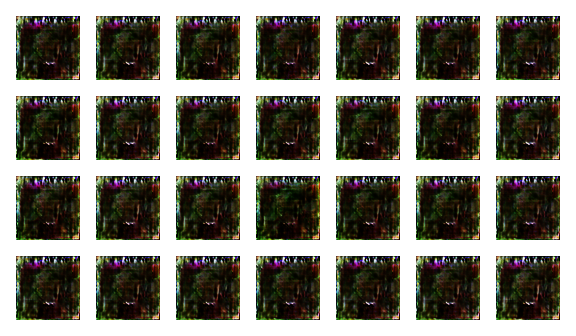

In [69]:
test_image("This flower is pink in colour", 1)
IPython.display.Image('D:/output/gan/train-1.png')

In [ ]:
test_image("This flower is pink in colour", 1)
IPython.display.Image('D:/output/gan/train-1.png')